In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def data_generator(N, n):
    np.random.seed(24)
    P = 5
    m = 100
    t = np.linspace(0, 2*np.pi, m)
    inp = []
    out = []
    for i in range(N):
        w = np.random.uniform(-1, 1, (5,P))
        alpha = np.random.uniform(0, 1, (2,P))
        #off = np.random.uniform(5,10)
        err = np.random.uniform(0, 0.1, (5,P))
        band = np.random.uniform(-1, 1, 5)
        normal_band = np.random.normal(0, 0.25, (5,20))
        err_line1 = np.random.uniform(0, 1, 5)
        err_line2 = np.random.uniform(-1, 0, 5)
        xx = np.zeros((n,m))
        yy = np.zeros(m)
        for j in range(P):
            xx[0] += w[0][j]*np.cos(alpha[0][j]*t)
            xx[1] += w[1][j]*np.cos(alpha[0][j]*t)
            xx[2] += w[2][j]*np.cos(alpha[0][j]*t)
            xx[3] += w[3][j]*np.cos(alpha[0][j]*t)
            xx[4] += w[4][j]*np.cos(alpha[0][j]*t)
            xx[5] += w[0][j]*np.cos(alpha[1][j]*t) + np.random.normal(0, err[0][j], m)
            xx[6] += w[1][j]*np.cos(alpha[1][j]*t) + np.random.normal(0, err[1][j], m)
            xx[7] += w[2][j]*np.cos(alpha[1][j]*t) + np.random.normal(0, err[2][j], m)
            xx[8] += w[3][j]*np.cos(alpha[1][j]*t) + np.random.normal(0, err[3][j], m)
            xx[9] += w[4][j]*np.cos(alpha[1][j]*t) + np.random.normal(0, err[4][j], m)
            yy += (w[0][j]+w[1][j]+w[2][j]+w[3][j]+w[4][j])*np.sin((alpha[0][j]+alpha[1][j])*t)
        error_zero1 = np.zeros(m)
        error_zero1[0:20] = normal_band[0]
        xx[10] = band[0]*np.ones(m) + error_zero1
        error_zero2 = np.zeros(m)
        error_zero2[20:40] = normal_band[1]
        xx[11] = band[1]*np.ones(m) + error_zero2
        error_zero3 = np.zeros(m)
        error_zero3[40:60] = normal_band[2]
        xx[12] = band[2]*np.ones(m) + error_zero3
        error_zero4 = np.zeros(m)
        error_zero4[60:80] = normal_band[3]
        xx[13] = band[3]*np.ones(m) + error_zero4
        error_zero5 = np.zeros(m)
        error_zero5[80:100] = normal_band[4]
        xx[14] = band[4]*np.ones(m) + error_zero5
        xx[15] = err_line1[0]*np.ones(m)
        xx[16] = err_line1[1]*np.ones(m)
        xx[17] = err_line1[2]*np.ones(m)
        xx[18] = err_line1[3]*np.ones(m)
        xx[19] = err_line1[4]*np.ones(m)
        xx[20] = err_line2[0]*np.ones(m)
        xx[21] = err_line2[1]*np.ones(m)
        xx[22] = err_line2[2]*np.ones(m)
        xx[23] = err_line2[3]*np.ones(m)
        xx[24] = err_line2[4]*np.ones(m)
        xx = xx + np.random.normal(0, 0.02, (n,m))
        yy = yy + np.random.normal(0, 0.02, m)
        for k in range(25):
            xx[k] = (1./max(abs(xx[k])))*xx[k]
        yy =(1./max(abs(yy)))*yy
        inp.append(xx)
        out.append(yy)
    return inp, out, t

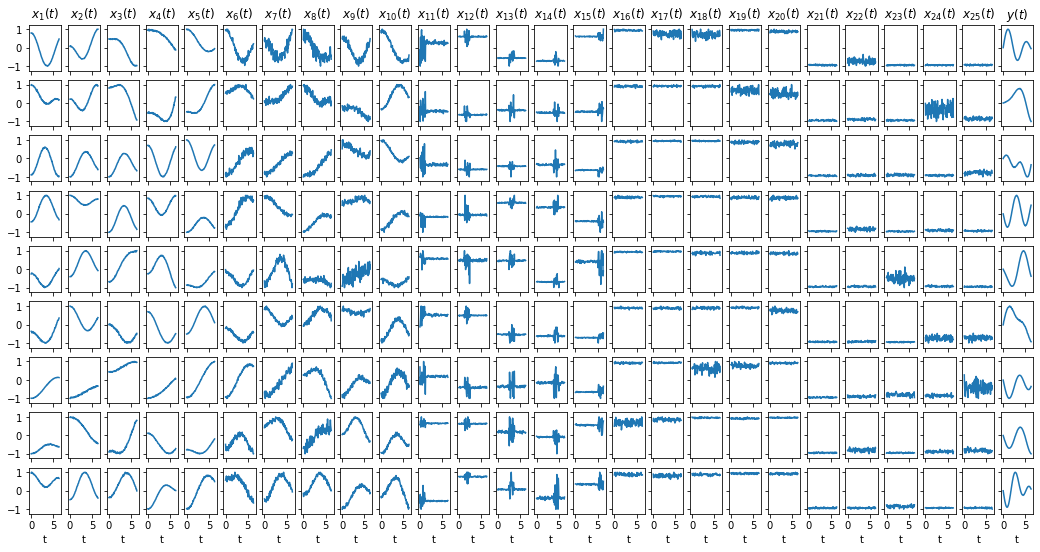

In [3]:
inp, out, t = data_generator(120, 25)
train_inp = inp[:80]
train_out = out[:80]
val_inp = inp[80:100]
val_out = out[80:100]
test_inp = inp[100:]
test_out = out[100:]
np.save('train_inp.npy', train_inp)
np.save('train_out.npy', train_out)
np.save('val_inp.npy', val_inp)
np.save('val_out.npy', val_out)
np.save('test_inp.npy',test_inp)
np.save('test_out.npy', test_out)
np.save('t.npy', t)
n_plots = 9
fig, axs = plt.subplots(n_plots, 26, sharex=True, sharey=True, figsize=(18,9))
custom_xlim = (-0.5, 6.8)
custom_ylim = (-1.25, 1.25)
plt.setp(axs, xlim=custom_xlim, ylim=custom_ylim)
for i in range(n_plots):
    for j in range(25):
        axs[i,j].plot(t, inp[i][j])
#     axs[i,0].plot(t, inp[i][0])
#     axs[i,1].plot(t, inp[i][1])
#     axs[i,2].plot(t, inp[i][2])
#     axs[i,3].plot(t, inp[i][3])
#     axs[i,4].plot(t, inp[i][4])
#     axs[i,5].plot(t, inp[i][5])
#     axs[i,6].plot(t, inp[i][6])
#     axs[i,7].plot(t, inp[i][7])
#     axs[i,8].plot(t, inp[i][8])
#     axs[i,9].plot(t, inp[i][9])
#     axs[i,10].plot(t, inp[i][10])
#     axs[i,11].plot(t, inp[i][11])
#     axs[i,12].plot(t, inp[i][0])
#     axs[i,13].plot(t, inp[i][1])
#     axs[i,14].plot(t, inp[i][2])
#     axs[i,15].plot(t, inp[i][3])
#     axs[i,16].plot(t, inp[i][4])
#     axs[i,17].plot(t, inp[i][5])
#     axs[i,].plot(t, inp[i][6])
#     axs[i,7].plot(t, inp[i][7])
#     axs[i,8].plot(t, inp[i][8])
#     axs[i,9].plot(t, inp[i][9])
#     axs[i,10].plot(t, inp[i][10])
#     axs[i,11].plot(t, inp[i][11])
#     axs[i,12].plot(t, inp[i][12])
#     axs[i,13].plot(t, inp[i][13])
#     axs[i,14].plot(t, inp[i][14])
    axs[i,25].plot(t, out[i])
for i in range(25):
    j = i+1
    axs[0,i].title.set_text('$x_{%.i}(t)$' % j)
# axs[0,0].title.set_text('$x_1(t)$')
# axs[0,1].title.set_text('$x_2(t)$')
# axs[0,2].title.set_text('$x_3(t)$')
# axs[0,3].title.set_text('$x_4(t)$')
# axs[0,4].title.set_text('$x_5(t)$')
# axs[0,5].title.set_text('$x_6(t)$')
# axs[0,6].title.set_text('$x_7(t)$')
# axs[0,7].title.set_text('$x_8(t)$')
# axs[0,8].title.set_text('$x_9(t)$')
# axs[0,9].title.set_text('$x_{10}(t)$')
# axs[0,10].title.set_text('$x_{11}(t)$')
# axs[0,11].title.set_text('$x_{12}(t)$')
# axs[0,12].title.set_text('$x_{13}(t)$')
# axs[0,13].title.set_text('$x_{14}(t)$')
# axs[0,14].title.set_text('$x_{15}(t)$')
axs[0,25].title.set_text('$y(t)$')
for i in range(26):
    axs[n_plots-1,i].set_xlabel('t')
# axs[n_plots-1,0].set_xlabel('t')
# axs[n_plots-1,1].set_xlabel('t')
# axs[n_plots-1,2].set_xlabel('t')
# axs[n_plots-1,3].set_xlabel('t')
# axs[n_plots-1,4].set_xlabel('t')
# axs[n_plots-1,5].set_xlabel('t')
# axs[n_plots-1,6].set_xlabel('t')
# axs[n_plots-1,7].set_xlabel('t')
# axs[n_plots-1,8].set_xlabel('t')
# axs[n_plots-1,9].set_xlabel('t')
# axs[n_plots-1,10].set_xlabel('t')
# axs[n_plots-1,11].set_xlabel('t')
# axs[n_plots-1,12].set_xlabel('t')
# axs[n_plots-1,13].set_xlabel('t')
# axs[n_plots-1,14].set_xlabel('t')
#axs[n_plots-1,12].set_xlabel('t')
plt.show()